# **Classification MNIST avec PCA et SVM**

Ce notebook illustre l’utilisation d’une **Analyse en Composantes Principales (PCA)** pour réduire la dimension du jeu de données MNIST, suivie de l’entraînement et de l’évaluation d’un classifieur **SVM** (Support Vector Machine) sur les données transformées.


## 1. Importer les bibliothèques et charger MNIST

**Ce que nous faisons** :
1. Importer les bibliothèques Python nécessaires : NumPy, matplotlib, seaborn et les utilitaires de scikit-learn.
2. Récupérer le jeu de données MNIST via OpenML.

À la fin de cette étape, nous aurons :
- `X` : nos données (images),
- `y` : les étiquettes (chiffres de 0 à 9).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Charger le jeu de données MNIST depuis OpenML
mnist = fetch_openml('mnist_784', version=1)

# Convertir les données en float32 et les étiquettes en int
X, y = mnist.data.astype(np.float32), mnist.target.astype(int)


## 2. Normaliser les données

**Ce que nous faisons** :
- Diviser chaque pixel par 255.0 afin que les valeurs soient comprises entre **0** et **1**.
- La normalisation facilite l’entraînement et améliore souvent les performances du modèle.


In [2]:
# Normalisation des données
X /= 255.0


## 3. Réduction de dimension avec PCA

**Ce que nous faisons** :
1. Réduire la dimension de 784 à 50.
2. La PCA aide à capturer l’essentiel de la variance en moins de dimensions, rendant l’entraînement plus rapide et parfois tout aussi précis.

**Pourquoi 50 ?**  
C’est un choix assez courant pour MNIST : un compromis entre la perte d’information et la vitesse de calcul.


In [3]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)


## 4. Séparer en données d’entraînement et de test

**Ce que nous faisons** :
- Réserver 20 % des données pour le test afin de vérifier la capacité de généralisation du modèle.
- Utiliser `train_test_split` avec un `random_state` pour rendre les résultats reproductibles.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


## 5. Entraîner un classifieur SVM

**Ce que nous faisons** :
1. Créer un **SVC (Support Vector Classifier)** avec un noyau RBF.
2. Régler le paramètre `C=10`, souvent efficace pour MNIST.
3. Ajuster (fit) le modèle sur nos données d’entraînement.

**Pourquoi un SVM ?**  
Les SVM peuvent donner de très bons résultats sur des tâches de classification d’images (y compris MNIST), surtout avec un noyau approprié et des données prétraitées.


In [5]:
svm_model = SVC(kernel='rbf', C=10)
svm_model.fit(X_train, y_train)


SVC(C=10)

## 6. Prédictions et évaluation du modèle

**Ce que nous faisons** :
1. Prédire les étiquettes sur les données de **test**.
2. Calculer la **précision (accuracy)** et afficher un **rapport de classification** (précision, rappel, F1-score).
3. Afficher ces résultats pour évaluer les performances du modèle.

**Pourquoi évaluer ?**  
Il est important de vérifier que le modèle a appris correctement et qu’il est capable de généraliser sur de nouvelles données.


In [6]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Taux de précision (SVM après PCA) : {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Taux de précision (SVM après PCA) : 98.54%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.99      0.98      1380
           3       0.98      0.98      0.98      1433
           4       0.98      0.99      0.98      1295
           5       0.99      0.98      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.99      0.99      1503
           8       0.98      0.98      0.98      1357
           9       0.98      0.97      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



## 7. Visualisation en 2D

**Ce que nous faisons** :
- Réduire les données à **2 composantes principales** pour les représenter sous forme de nuage de points (scatter plot).
- Il est normal que les chiffres se mélangent un peu en 2D car MNIST nécessite généralement plus de dimensions pour une bonne séparation.


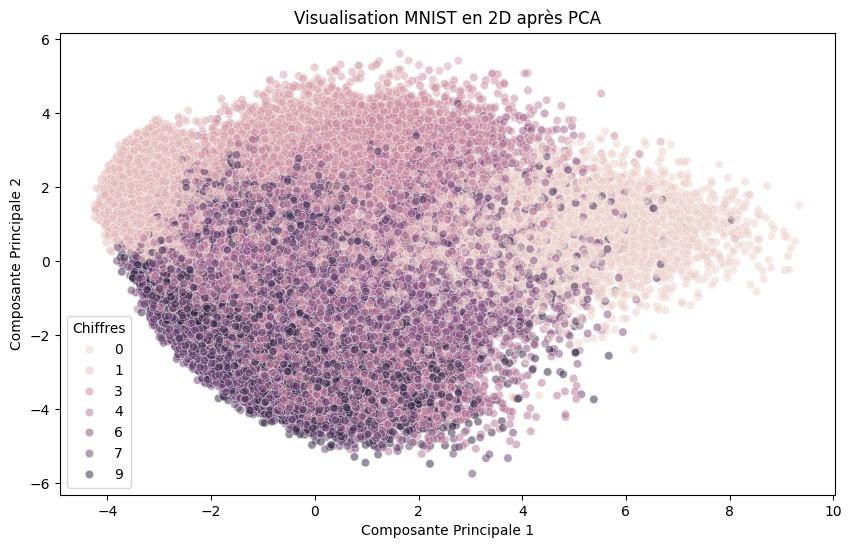

In [7]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, alpha=0.5)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Visualisation MNIST en 2D après PCA")
plt.legend(title="Chiffres")
plt.show()


## 8. Comparaison de différents paramètres du SVM et visualisation

Dans cette section, nous allons tester plusieurs **noyaux** (kernel) et plusieurs valeurs de **C** pour notre SVM, puis afficher un graphique pour observer l’impact de ces variations sur la précision (accuracy) en test.

- **Noyaux testés** : `linear`, `rbf`, `poly`
- **Valeurs de C testées** : 0.1, 1, 10

### Pourquoi ces choix ?
- Le noyau (kernel) détermine la fonction de transformation utilisée par le SVM.
- Le paramètre **C** contrôle la marge d’erreur tolérée : une valeur plus élevée de C cherche davantage à **éviter les erreurs** sur l’ensemble d’entraînement (risque de surapprentissage), tandis qu’une valeur plus faible de C est plus tolérante (potentiellement moins précise, mais parfois mieux généralisée).

Après avoir entraîné chaque configuration, nous calculerons la précision sur l’ensemble de **test**. Finalement, nous afficherons des graphes pour comparer les résultats obtenus.


In [10]:
from sklearn.decomposition import PCA

# Projection en 2D (PCA)
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)
X_test_2d  = pca_2d.transform(X_test)


### Cellule : SVM (kernel=linear, C=0.1)


Précision (kernel=linear, C=0.1) : 0.9323571428571429


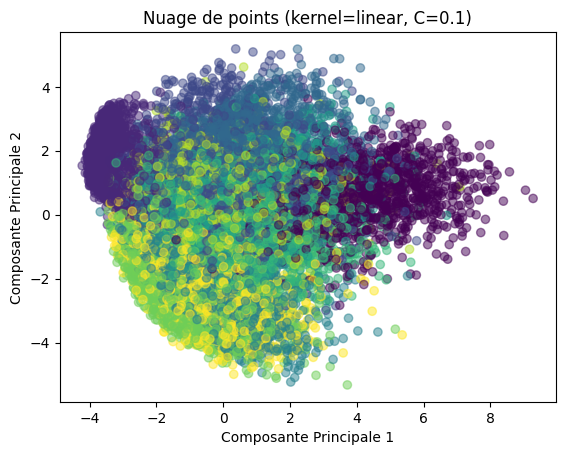

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# SVM linéaire avec C=0.1
svm_lin_01 = SVC(kernel='linear', C=0.1)
svm_lin_01.fit(X_train, y_train)

# Prédiction
y_pred_lin_01 = svm_lin_01.predict(X_test)
acc_lin_01 = accuracy_score(y_test, y_pred_lin_01)
print("Précision (kernel=linear, C=0.1) :", acc_lin_01)

# Visualisation PCA 2D
plt.figure()
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_lin_01, alpha=0.5)
plt.title("Nuage de points (kernel=linear, C=0.1)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()


### SVM (kernel=linear, C=0.1)
- Un **C** faible (0.1) autorise davantage d’erreurs sur l’entraînement (faible pénalisation).  
- Peut engendrer un **sous-apprentissage** si la frontière linéaire ne suffit pas à bien séparer les chiffres.  
- La **précision** obtenue est souvent assez modeste.

### Cellule : SVM (kernel=linear, C=1)


Précision (kernel=linear, C=1) : 0.9333571428571429


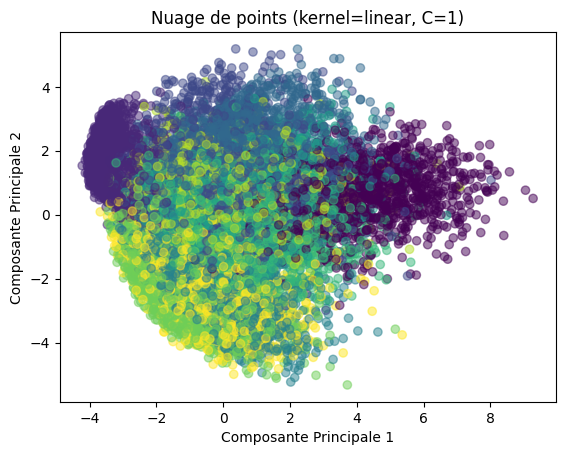

In [12]:
svm_lin_1 = SVC(kernel='linear', C=1)
svm_lin_1.fit(X_train, y_train)

y_pred_lin_1 = svm_lin_1.predict(X_test)
acc_lin_1 = accuracy_score(y_test, y_pred_lin_1)
print("Précision (kernel=linear, C=1) :", acc_lin_1)

plt.figure()
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_lin_1, alpha=0.5)
plt.title("Nuage de points (kernel=linear, C=1)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()


### SVM (kernel=linear, C=1)
- Un **C** plus grand (1) renforce la pénalisation des erreurs et réduit le sous-apprentissage.  
- On obtient généralement une **meilleure précision** qu’avec C=0.1, mais le noyau linéaire reste limité pour MNIST.  
- La frontière linéaire n’est pas toujours assez flexible pour classer tous les chiffres.


### Cellule : SVM (kernel=rbf, C=1)


Précision (kernel=rbf, C=1) : 0.9806428571428571


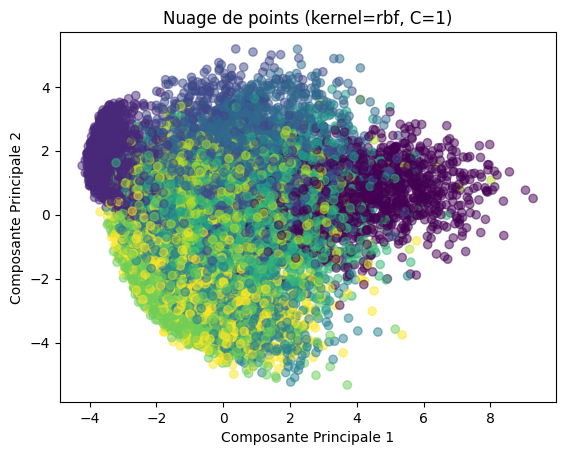

In [13]:
svm_rbf_1 = SVC(kernel='rbf', C=1)
svm_rbf_1.fit(X_train, y_train)

y_pred_rbf_1 = svm_rbf_1.predict(X_test)
acc_rbf_1 = accuracy_score(y_test, y_pred_rbf_1)
print("Précision (kernel=rbf, C=1) :", acc_rbf_1)

plt.figure()
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_rbf_1, alpha=0.5)
plt.title("Nuage de points (kernel=rbf, C=1)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()


### SVM (kernel=rbf, C=1)
- Le **noyau RBF** (Radial Basis Function) gère mieux la non-linéarité.  
- Sur MNIST, il améliore souvent la **précision** par rapport au linéaire.  
- C=1 propose un compromis régularisation/flexibilité correct, les performances sont déjà satisfaisantes.


### Cellule : SVM (kernel=rbf, C=10)


Précision (kernel=rbf, C=10) : 0.9853571428571428


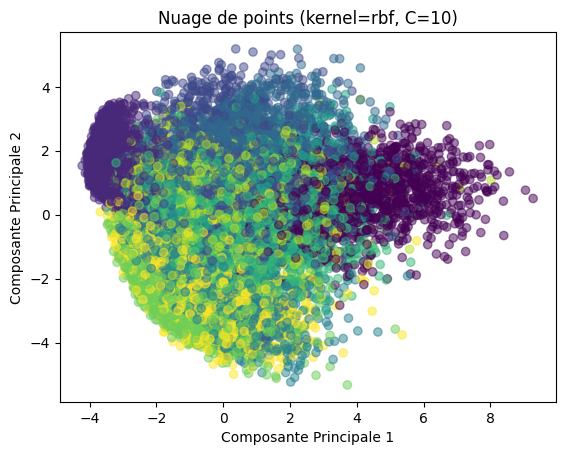

In [14]:
svm_rbf_10 = SVC(kernel='rbf', C=10)
svm_rbf_10.fit(X_train, y_train)

y_pred_rbf_10 = svm_rbf_10.predict(X_test)
acc_rbf_10 = accuracy_score(y_test, y_pred_rbf_10)
print("Précision (kernel=rbf, C=10) :", acc_rbf_10)

plt.figure()
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_rbf_10, alpha=0.5)
plt.title("Nuage de points (kernel=rbf, C=10)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()


### SVM (kernel=rbf, C=10)
- Un **C** plus élevé (10) pénalise davantage les erreurs sur l’entraînement.  
- Cela peut encore augmenter la **précision** (si le surapprentissage n’est pas trop fort).  
- Sur MNIST, la combinaison RBF + C relativement élevé est souvent performante.


### Cellule : SVM (kernel=poly, C=1)


Précision (kernel=poly, C=1) : 0.9814285714285714


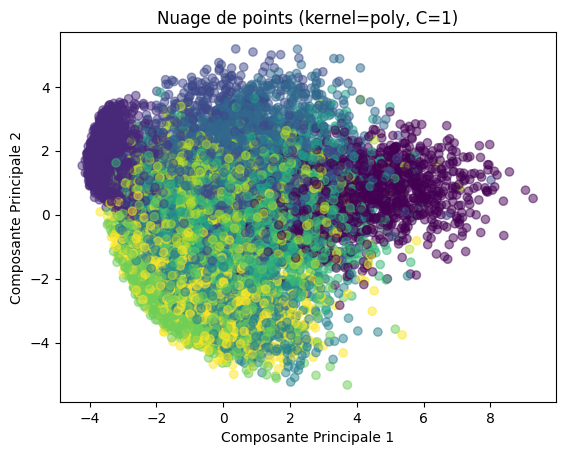

In [15]:
svm_poly_1 = SVC(kernel='poly', C=1)
svm_poly_1.fit(X_train, y_train)

y_pred_poly_1 = svm_poly_1.predict(X_test)
acc_poly_1 = accuracy_score(y_test, y_pred_poly_1)
print("Précision (kernel=poly, C=1) :", acc_poly_1)

plt.figure()
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_poly_1, alpha=0.5)
plt.title("Nuage de points (kernel=poly, C=1)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()


### SVM (kernel=poly, C=1)
- Le noyau **poly** propose une séparation polynomiale.  
- C=1 garde une régularisation intermédiaire ; les performances peuvent être bonnes, parfois équivalentes au RBF.  
- Le **degré** polynominal (3 par défaut) joue un rôle important, même si on ne le modifie pas ici.


### Cellule : SVM (kernel=poly, C=10)


Précision (kernel=poly, C=10) : 0.9827142857142858


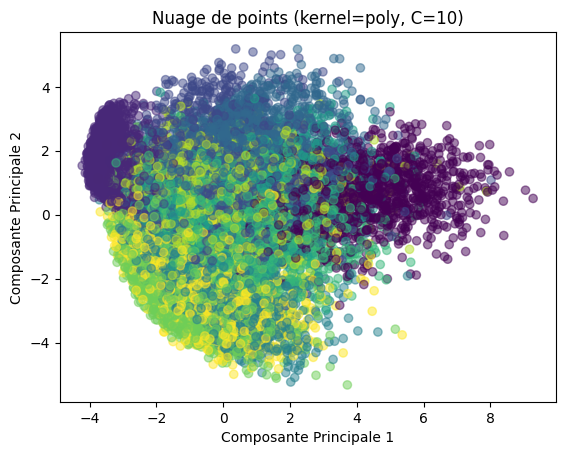

In [16]:
svm_poly_10 = SVC(kernel='poly', C=10)
svm_poly_10.fit(X_train, y_train)

y_pred_poly_10 = svm_poly_10.predict(X_test)
acc_poly_10 = accuracy_score(y_test, y_pred_poly_10)
print("Précision (kernel=poly, C=10) :", acc_poly_10)

plt.figure()
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_poly_10, alpha=0.5)
plt.title("Nuage de points (kernel=poly, C=10)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()


### SVM (kernel=poly, C=10)
- Ici, on renforce la pénalisation (C=10) avec un noyau polynominal.  
- Peut conduire à de meilleurs résultats ou à un **surapprentissage**, selon les données et le degré.  
- L

## Conclusion générale

- **kernel=linear** : utile si les données sont très bien séparables par un hyperplan, mais reste parfois trop limité pour MNIST.  
- **kernel=rbf** : souvent un très bon choix pour MNIST, grâce à la **flexibilité** du noyau RBF à modéliser des frontières complexes.  
- **kernel=poly** : peut approcher ou égaler la performance RBF, mais **dépend fortement** du degré polynominal et d’autres hyperparamètres.  
- **Paramètre C** : plus il est élevé, plus on **pénalise les erreurs** sur l’entraînement. Cela peut améliorer la précision, mais attention au **risque de surapprentissage** si la valeur de C est trop grande.
